In [1]:
import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=1)
dut.connect(ser)

In [12]:
import dut_a0 as a0

In [2]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default


In [3]:
drv.clk_stop('ADC_CK')
drv.clk_stop('CK_ARRAY')
drv.clk_config('ADC_CK', divisor=2)
drv.clk_config('CK_ARRAY', divisor=2)
drv.clk_start('ADC_CK')
drv.clk_start('CK_ARRAY')

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


In [14]:
dut.disconnect()

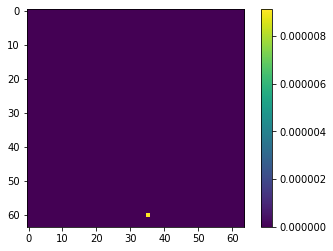

In [4]:
array = 2
Vread = 0.2
gain = -1
Gmap = a0.pic_read_batch(array, Vread=Vread, gain=gain) / Vread
plt.imshow(Gmap)
plt.colorbar()

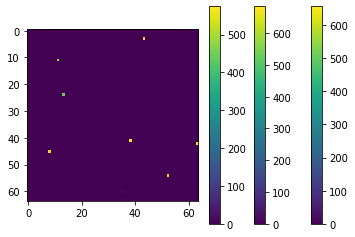

In [7]:
vRead = 0.2
Vgate = 5

arr = 0
numRows = 64
numCols = 64
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap0[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap0)
plt.colorbar()

arr = 1
numRows = 64
numCols = 64
Gmap1 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap1[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap1)
plt.colorbar()

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

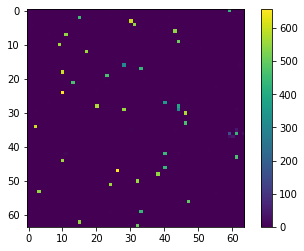

In [8]:
plt.imshow(Gmap0)
plt.colorbar()

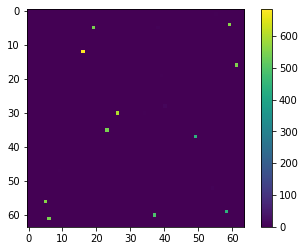

In [9]:
plt.imshow(Gmap1)
plt.colorbar()

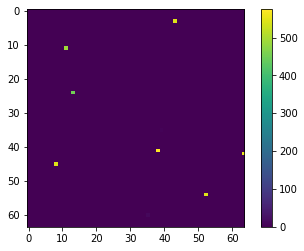

In [10]:
plt.imshow(Gmap2)
plt.colorbar()

In [ ]:
vRead = 0.2
Vgate = 5

arr = 2
numRows = 64
numCols = 64
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            rdCurr = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1)  
            Gmap2[rr,cc] = 1e6*rdCurr/vRead
plt.imshow(Gmap2)
plt.colorbar()

In [13]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('Exported60Node_GraphNum0.mat')
targetA = mat_contents['A']

vRead = 0.2

arr = 2
Vgate = 5
Vref = 0.5

targetGON = 100e-6
targetONTolerance = 3e-6
targetGOFF = 3e-6
targetOFFTolerance = 3e-6

targetG = np.zeros((64,64))
targetG[0:60,0:60] = targetA*(targetGON-targetGOFF) 
targetG = targetG + targetGOFF

targetTolerance = np.ones((64,64))*targetONTolerance

targetGLow = targetG-targetTolerance
targetGHigh = targetG+targetTolerance
    
vSetRamp = np.arange(0.3, 4.1, 0.1)
vGateSetRamp = np.arange(0.5, 1.4, 0.05)
vResetRamp = np.arange(0.3, 4.05, 0.25)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 3

rowscols=np.nonzero(Gmap2 < targetGLow)
testRows = rowscols[0]
testCols = rowscols[1]

for ii in range(2):
    rr = testRows[ii]
    cc = testCols[ii]        
    initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
    finalG = a0.cell_program_with_fb(arr, rr, cc, targetGON, targetONTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
    if ( (finalG >= (targetGON-targetONTolerance)) & (finalG <= (targetGON+targetONTolerance)) ):
        print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetGON))
    else:
        print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetGON))
    

AttributeError: module 'dut_a0' has no attribute 'cell_program_with_fb'